# 모듈 불러오기

#### 기본

In [1]:
import numpy as np
import pandas as pd
import joblib

In [2]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno

#### 전처리

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [4]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [5]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### 회귀

In [6]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [7]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [10]:
df = pd.read_csv('./공원_최종.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PARK_SN                    106 non-null    int64  
 1   공원명                        61 non-null     object 
 2   행정동                        106 non-null    object 
 3   x                          106 non-null    float64
 4   y                          106 non-null    float64
 5   면적                         106 non-null    int64  
 6   공공시설_개수                    106 non-null    int64  
 7   노인및사회복지시설_개수               106 non-null    int64  
 8   문화및집회시설_개수                 106 non-null    int64  
 9   영유아시설_개수                   106 non-null    int64  
 10  운동시설_개수                    106 non-null    int64  
 11  의료시설_개수                    106 non-null    int64  
 12  의원_개수                      106 non-null    int64  
 13  제1종근린생활시설_개수               106 non-null    int64  

In [12]:
df.tail(1)

,PARK_SN,공원명,행정동,x,y,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,...,행정동 독거노인비율,행정동 독거노인밀도,기초생활수급자 고령인구수 (생계/주거/의료),기초생활수급자 고령인구밀도 (생계/주거/의료),최근접_지하철역사 (m),최근접_버스정류소 (m),최근접_주차장 (m),최근접_노인사회복지시설 (m),최근접_의료시설 (m),경사도
105,138,NaN,가양2동,126.852721,37.564682,1499,6,5,11,5,...,0.12,1690.0,1673,1673.0,380.067832,66.418356,1214.910969,2.716621,249.526913,0.5


# 데이터 전처리
- df_fix 변수

In [13]:
drop_col = [ '공공시설_개수',
 '노인및사회복지시설_개수',
 '문화및집회시설_개수',
 '영유아시설_개수',
 '운동시설_개수',
 '의료시설_개수',
 '의원_개수',
 '제1종근린생활시설_개수',
 '제2종근린생활시설_개수',
 '주거_개수',
 '주차장_개수',
 '치안안전시설_개수',
 '판매및영업시설_개수',
 '학군_개수',
 '화장실_개수',]

In [14]:
df_fix = df.drop(drop_col, axis=1)

In [15]:
list(df_fix)

['PARK_SN',
 '공원명',
 '행정동',
 'x',
 'y',
 '면적',
 '행정동 인구 (명)',
 '행정동 면적 (㎢)',
 '행정동 인구밀도 (명/㎢)',
 '행정동 고령인구수',
 '행정동 고령인구비율',
 '행정동 고령인구밀도',
 '행정동 독거노인수',
 '행정동 독거노인비율',
 '행정동 독거노인밀도',
 '기초생활수급자 고령인구수 (생계/주거/의료)',
 '기초생활수급자 고령인구밀도 (생계/주거/의료)',
 '최근접_지하철역사 (m)',
 '최근접_버스정류소 (m)',
 '최근접_주차장 (m)',
 '최근접_노인사회복지시설 (m)',
 '최근접_의료시설 (m)',
 '경사도']

# 행정동별 평균 경사도
- df_dong_slope 변수

In [16]:
figure_size = (18, 10)
marker = 'o'
color = 'black'
title_size = 15

In [17]:
df_dong_slope = df_fix.groupby('행정동', as_index=False)['경사도'].mean()

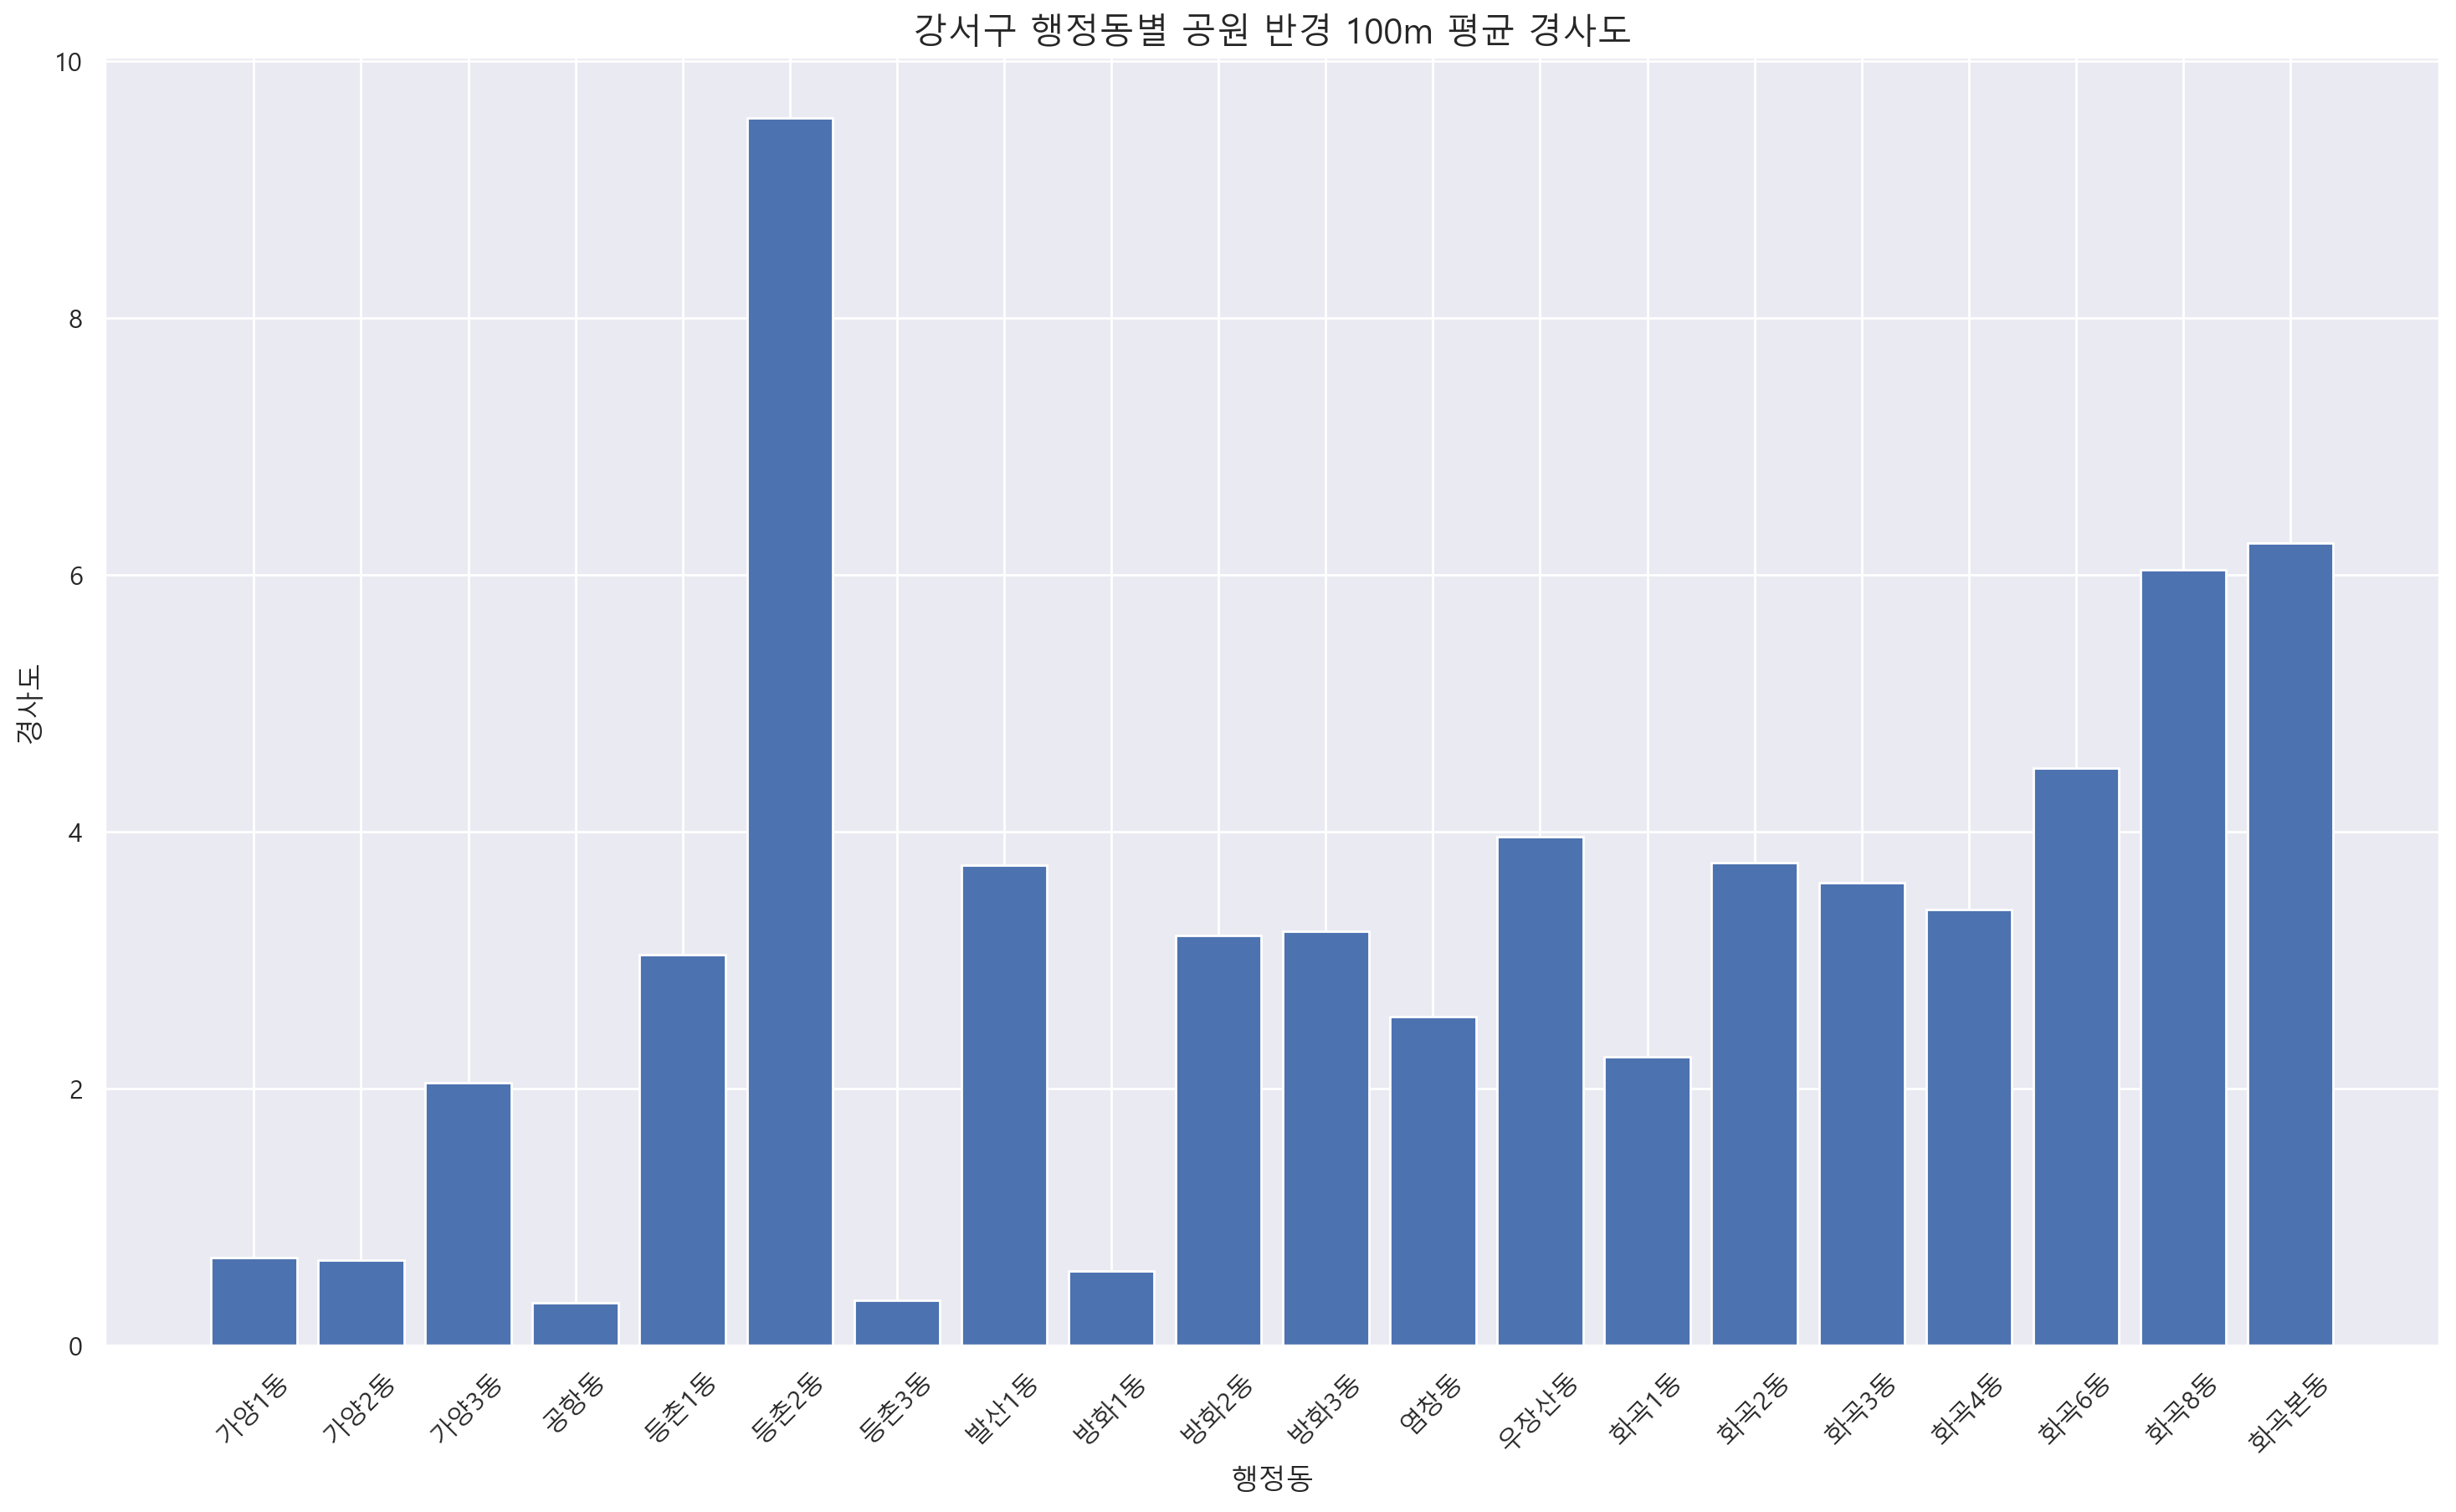

In [18]:
title = '강서구 행정동별 공원 반경 100m 평균 경사도'
xlabel = '행정동'
ylabel = '경사도'

plt.figure(figsize=figure_size)
plt.bar(df_dong_slope[xlabel], df_dong_slope[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/경사도/{title}.png')
plt.show()

# 행정동별 공원의 개수
- df_dong_count 변수

In [19]:
df_dong_count = df_fix.groupby('행정동', as_index=False)['행정동'].value_counts()

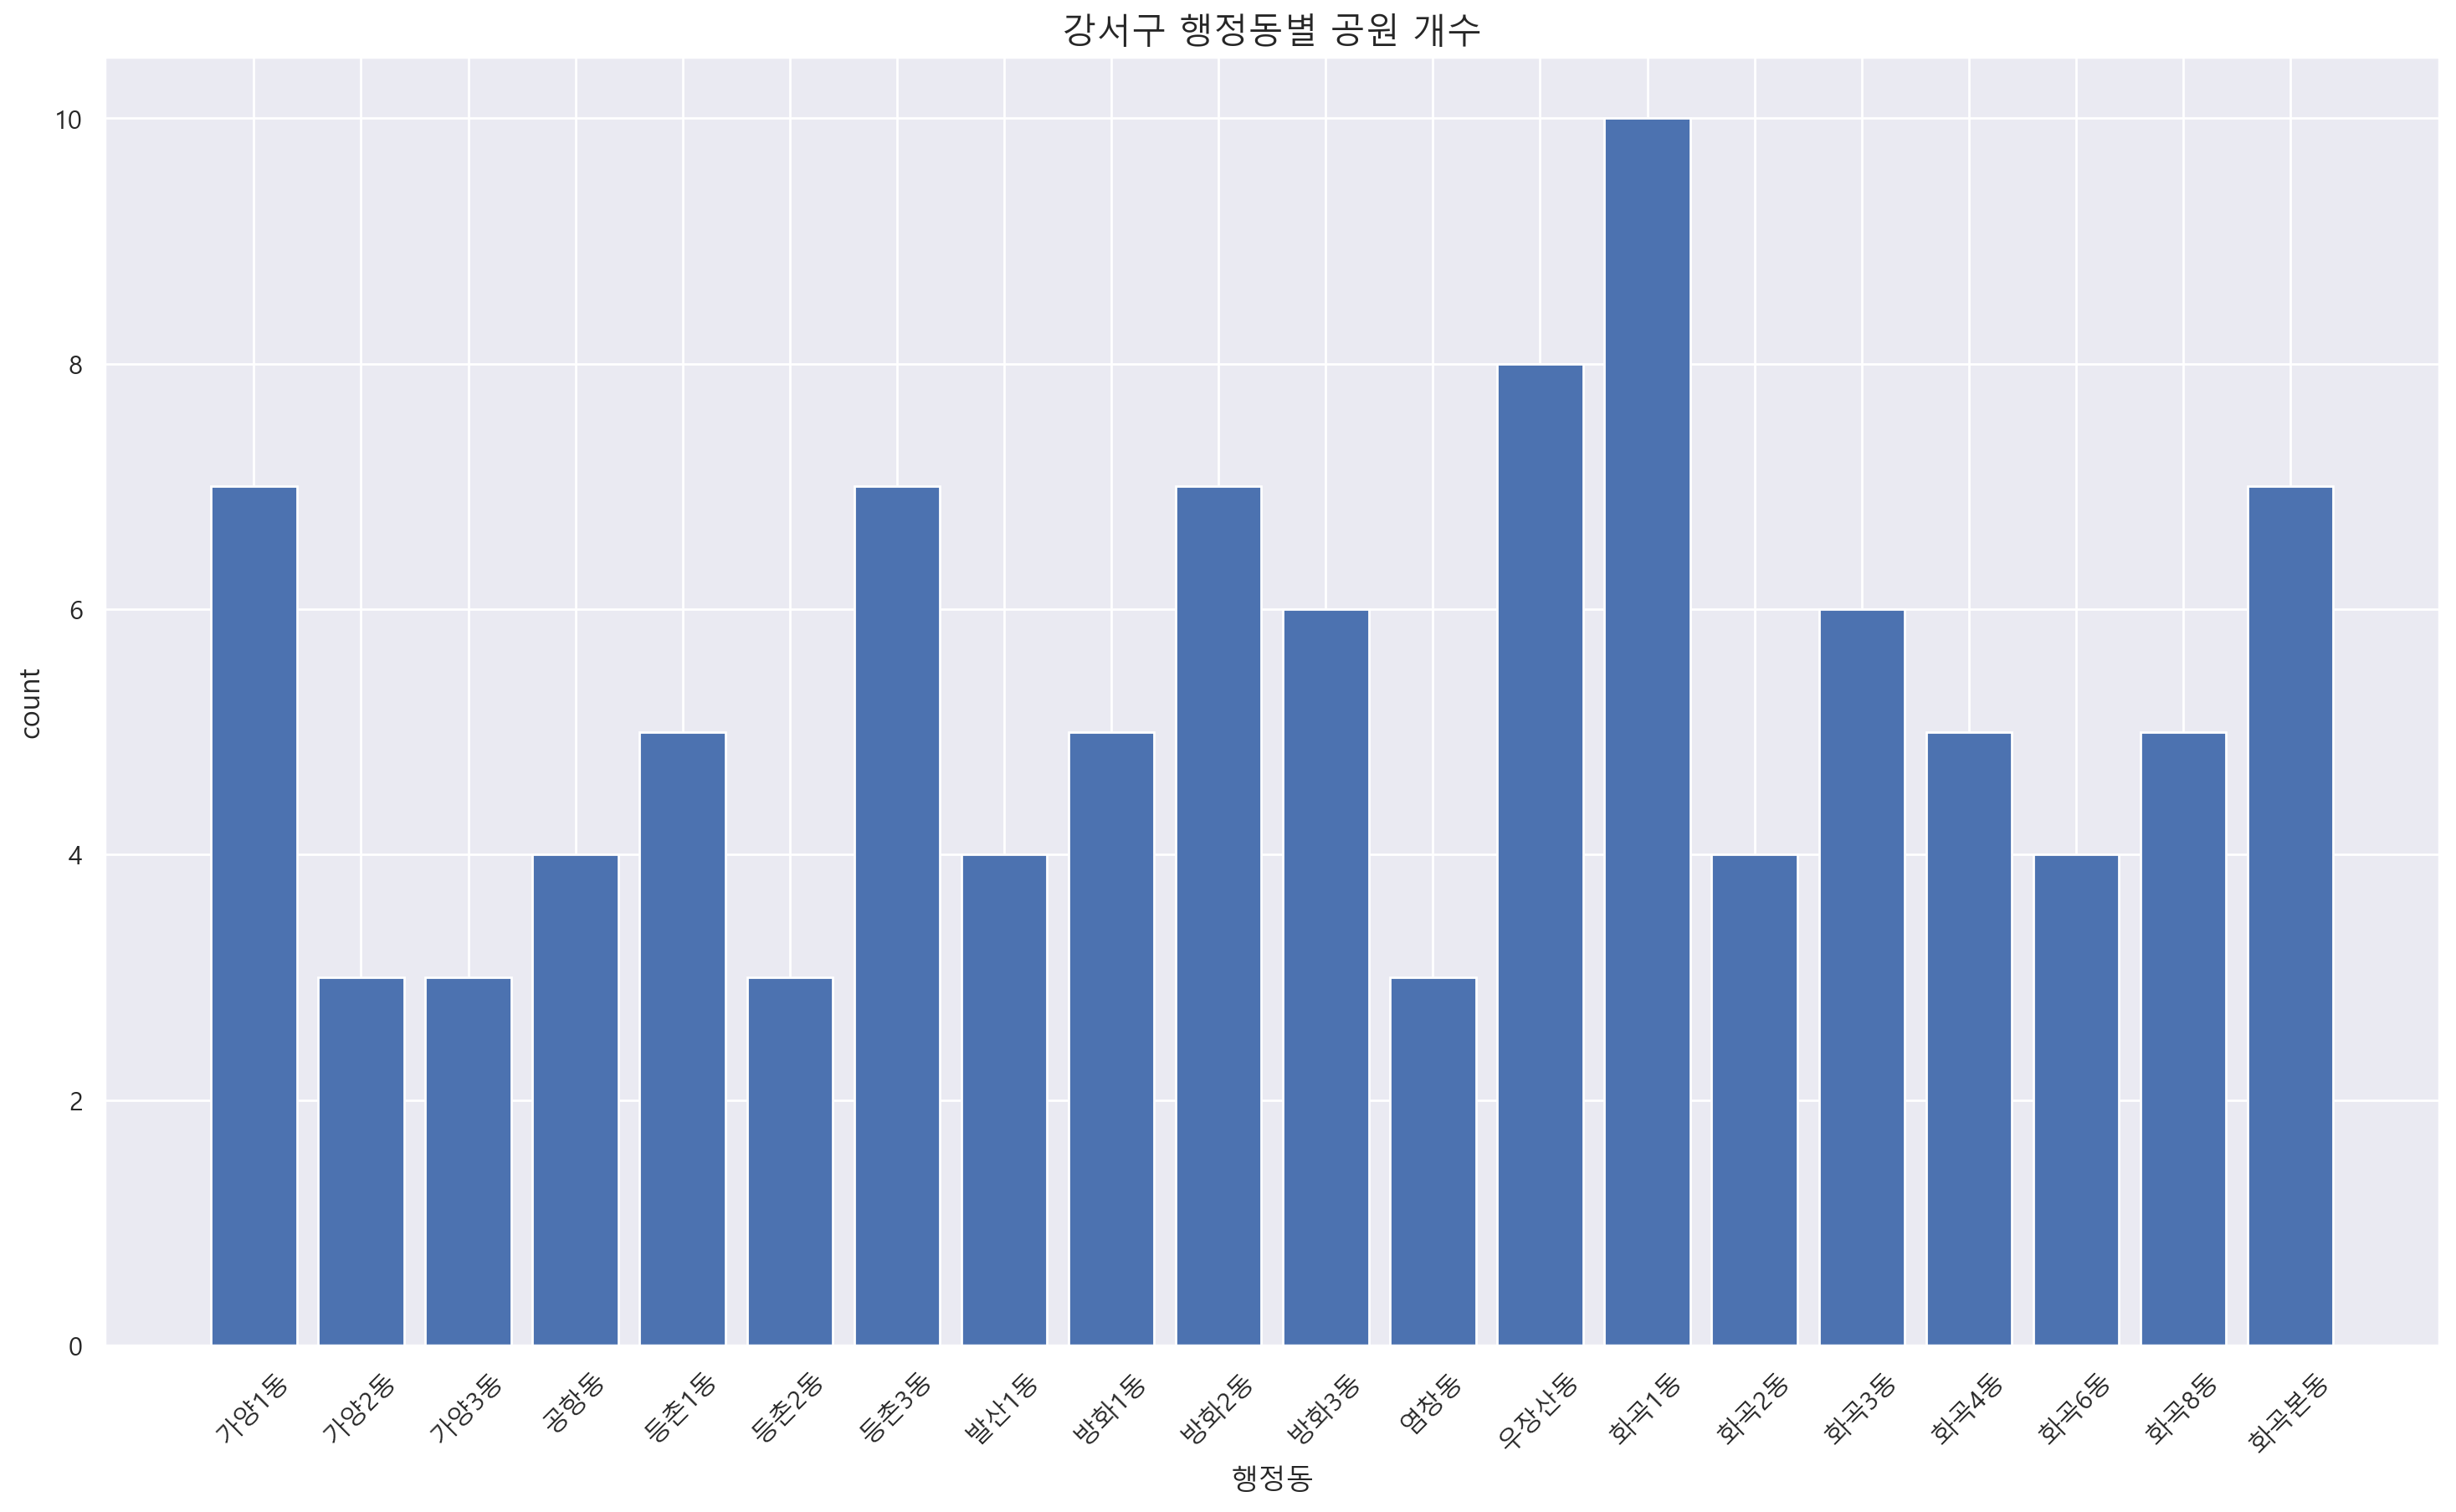

In [20]:
title = '강서구 행정동별 공원 개수'
xlabel = '행정동'
ylabel = 'count'

plt.figure(figsize=figure_size)
plt.bar(df_dong_count[xlabel], df_dong_count[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/경사도/{title}.png')
plt.show()

# 행정동 전체 면적별 경사도
- df_dong_total 변수
- df_dong_total_slope 변수

In [21]:
df_dong_total = pd.read_csv('../../data/경사도/강서구_행정동별_경사도.csv')

In [22]:
df_dong_total.tail(2)

,fid,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,fid_2,DN,area
56605,20,20210630,1116074,우장산동,260,107367,3,31089
56606,20,20210630,1116074,우장산동,260,129123,0,15526456


In [27]:
df_dong_total.head()

,fid,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,fid_2,DN,area
0,1,20210630,1116051,염창동,241,77255,3,100
1,1,20210630,1116051,염창동,241,77291,25,200
2,1,20210630,1116051,염창동,241,77292,16,100
3,1,20210630,1116051,염창동,241,77293,5,100
4,1,20210630,1116051,염창동,241,77294,1,100


In [23]:
df_dong_total_slope = df_dong_total.groupby('ADM_DR_NM', as_index=False)['DN', 'area'].mean()

In [24]:
df_dong_total_slope.columns = ['행정동', '경사도', '면적']

In [25]:
df_dong_total_slope

,행정동,경사도,면적
0,가양1동,9.460820,5568.415153
1,가양2동,8.394319,16306.964912
2,가양3동,5.037190,32697.880165
3,공항동,3.941860,13407.587551
4,등촌1동,3.976909,28165.243339
5,등촌2동,13.494668,229.646698
6,등촌3동,2.716216,215165.135135
7,발산1동,7.972686,4796.240785
8,방화1동,3.388889,29480.921147
9,방화2동,13.478118,2200.384101


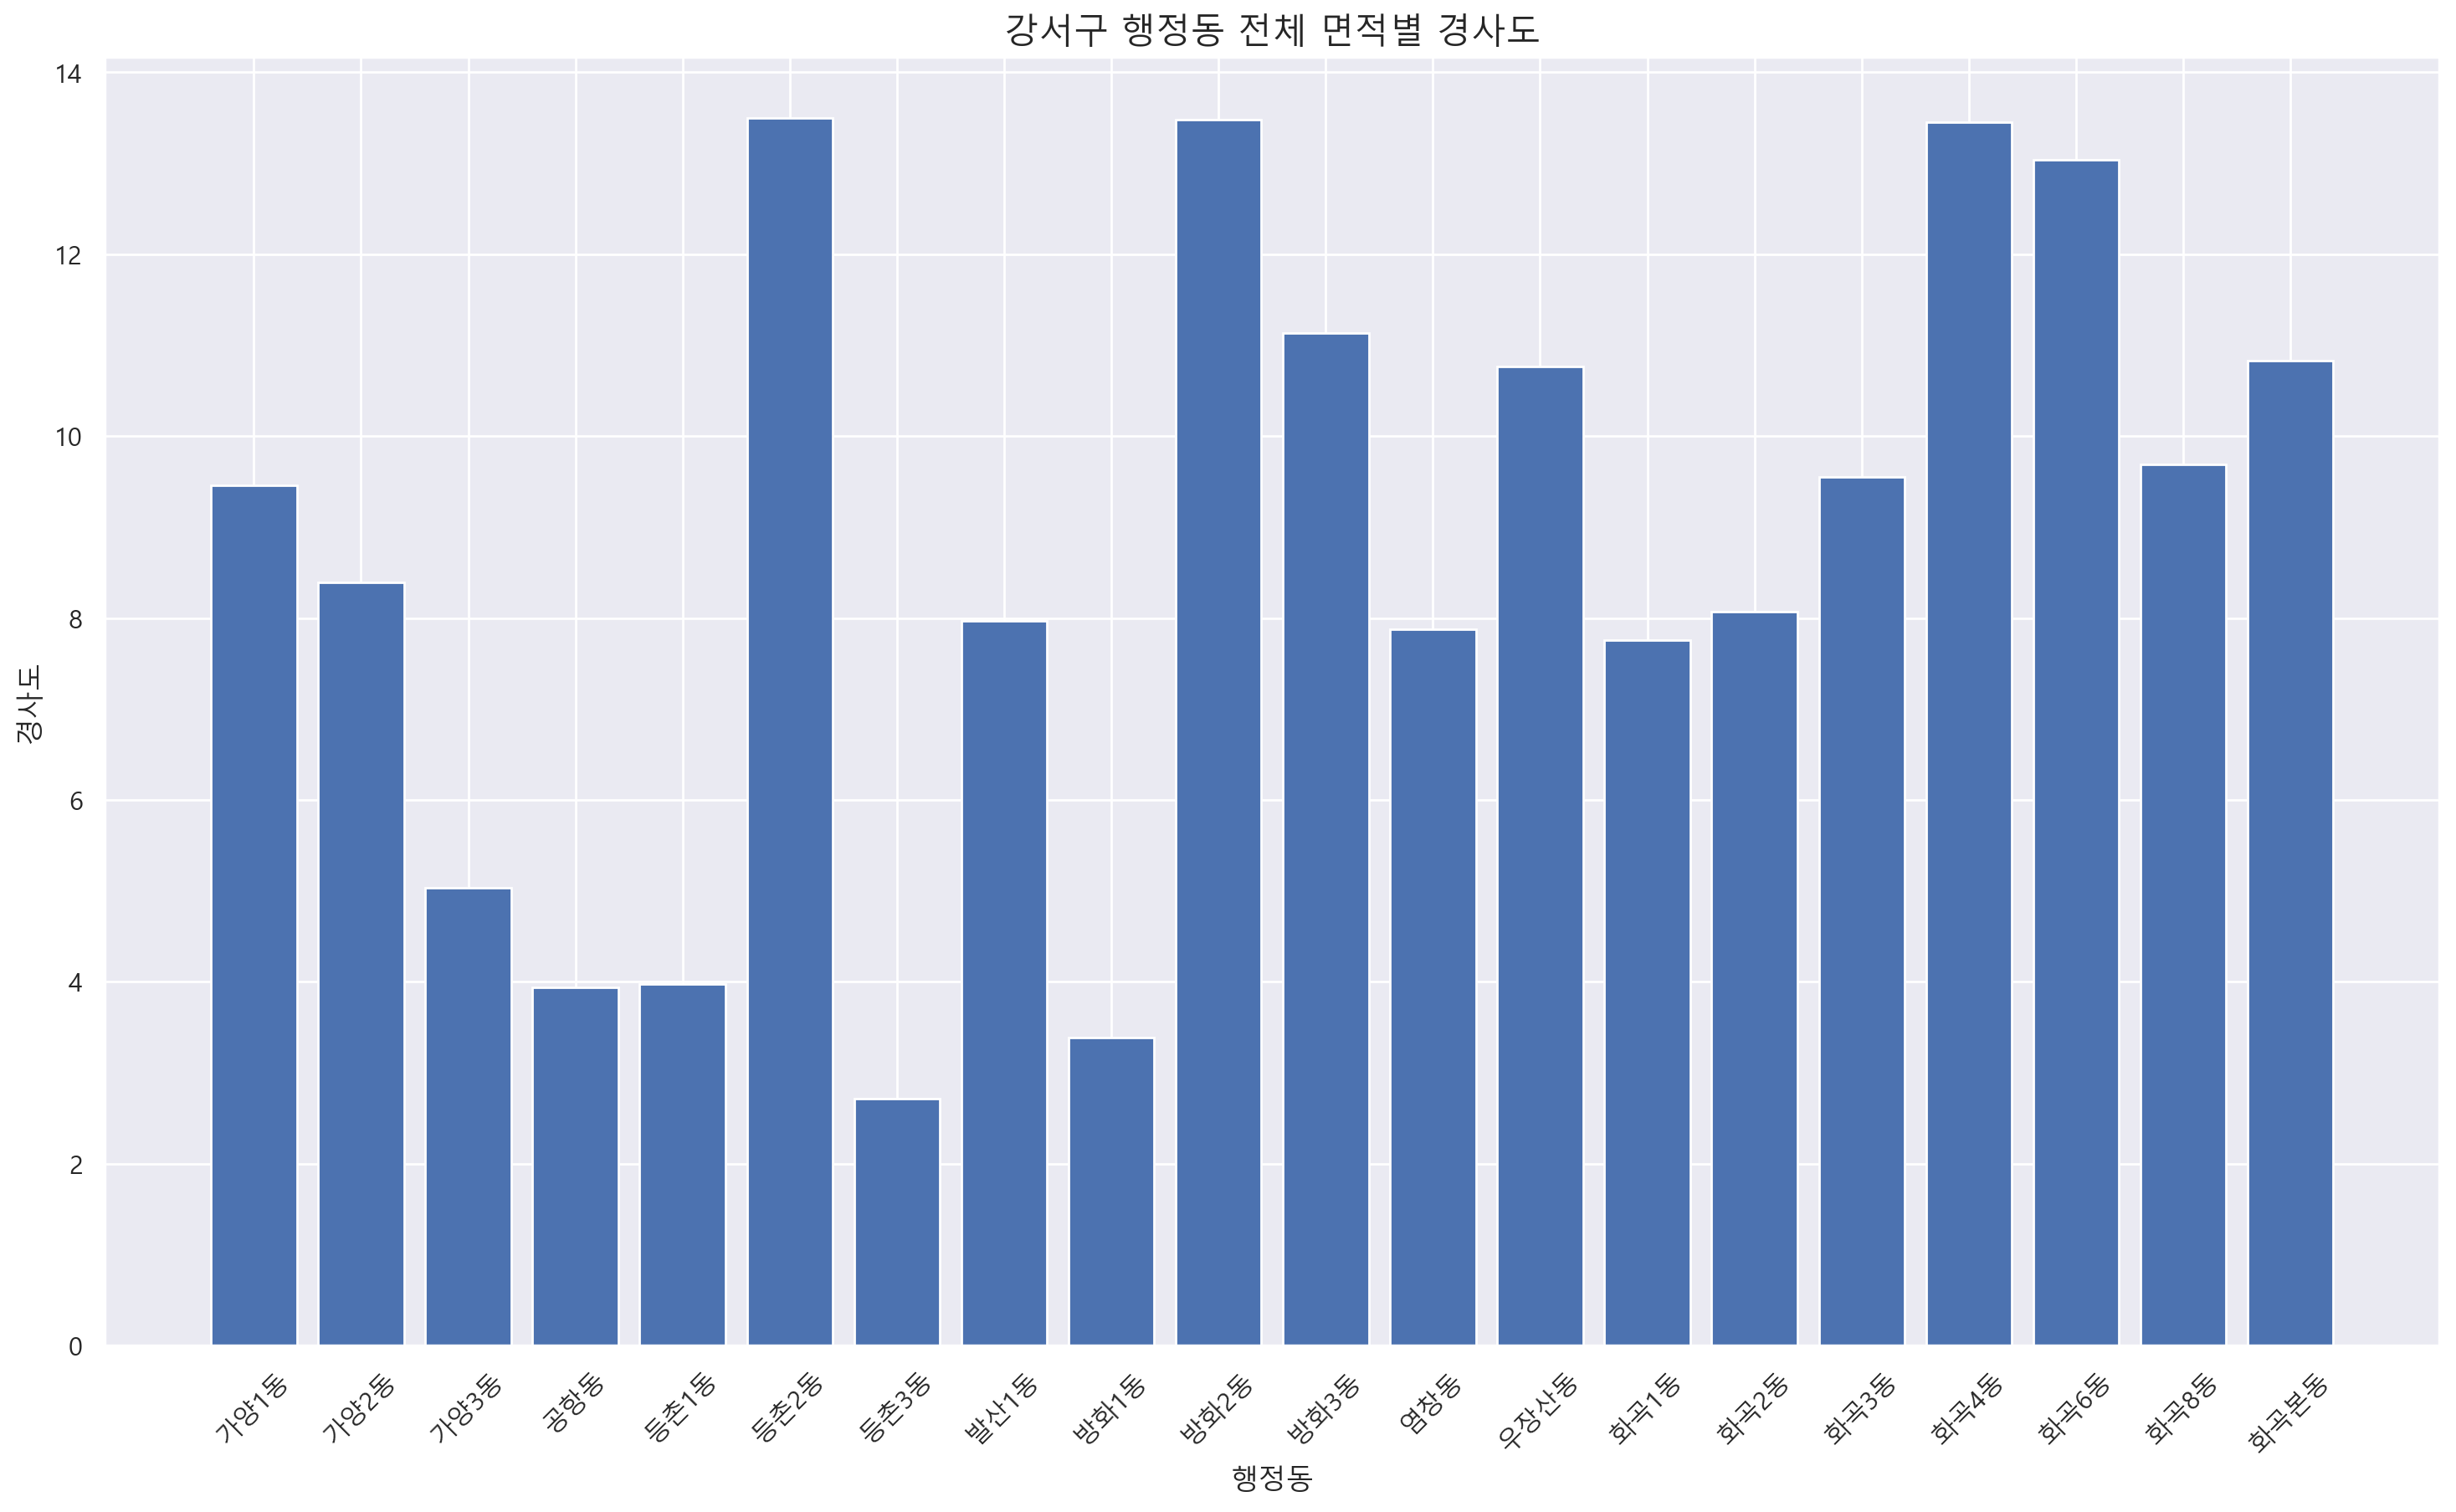

In [26]:
title = '강서구 행정동 전체 면적별 경사도'
xlabel = '행정동'
ylabel = '경사도'

plt.figure(figsize=figure_size)
plt.bar(df_dong_total_slope[xlabel], df_dong_total_slope[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/경사도/{title}.png')
plt.show()